In [96]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import seaborn as sns

In [97]:
def read_dataset():
    abalone = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
    urlretrieve(abalone)
    abalone_df = pd.read_csv(abalone, names=['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings'], header=None)
    return (abalone_df) 

In [125]:
#histograms for continuous valued features:
def visualise_features(abalone_df):
    sns.set()
    fig, axes = plt.subplots(3, 3, figsize=(15,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    axes[0][0].set_title("Sex")
    axes[0][1].set_title("Length")
    axes[0][2].set_title("Diameter")
    axes[1][0].set_title("Height")
    axes[1][1].set_title("Whole Weight")
    axes[1][2].set_title("Shucked weight")
    axes[2][0].set_title("Viscera weight")
    axes[2][1].set_title("Shell weight")
    sns.countplot(x = abalone_df["sex"], ax=axes[0][0]).set_title('Sex')
    sns.histplot(abalone_df["length"], ax=axes[0][1])
    sns.histplot(abalone_df["diameter"], ax=axes[0][2])
    sns.histplot(abalone_df["height"], ax=axes[1][0])
    sns.histplot(abalone_df["whole weight"], ax=axes[1][1])
    sns.histplot(abalone_df["shucked weight"], ax=axes[1][2])
    sns.histplot(abalone_df["viscera weight"], ax=axes[2][0])
    sns.histplot(abalone_df["shell weight"], ax=axes[2][1])
    plt.show()

In [99]:
def onehotencoding(dataset):
    M = []
    F = []
    I = []
    cols = dataset['sex']
    for i in cols:
        if(i == 'M'):
            M.append(1)
            F.append(0)
            I.append(0)
        elif(i == 'F'):
            M.append(0)
            F.append(1)
            I.append(0)
        elif(i == 'I'):
            M.append(0)
            F.append(0)
            I.append(1)
    dataset = dataset.drop(columns=['sex'])
    dataset['M'] = pd.Series(M)
    dataset['F'] = pd.Series(F)
    dataset['I'] = pd.Series(I)
    return dataset

In [100]:
def split_normalised_dataset(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1 ,random_state=4)
    std_cols = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight']

    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()

    for i in std_cols:
        scaler = StandardScaler().fit(features[[i]])
        X_train_stand[i] = scaler.transform(X_train_stand[[i]])
        X_test_stand[i] = scaler.transform(X_test_stand[[i]])   
    
    return (X_train_stand, X_test_stand, y_train, y_test)

In [101]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)

In [102]:
def plotChart(iterations, cost):
    sns.lineplot(x=range(iterations), y=cost)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.show()

In [103]:
def display_metrics(y_test, y_pred):
    print('R2 scpre: %.5f'
            % metrics.r2_score(y_test, y_pred))
    print('Variance score: %.5f'
            % metrics.r2_score(y_test, y_pred))
    print('Root mean squared error: %.5f'
            % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [104]:
def linear_regression_sklearn(X, y):
    lr = LinearRegression()
    min_rmse = float('inf')
    best_lr = None
    for train, val in kf.split(X):
        lr.fit(X.iloc[train], y.iloc[train])
        y_pred = lr.predict(X.iloc[val])
        r = np.sqrt(metrics.mean_squared_error(y.iloc[val], y_pred))
        if r < min_rmse:
            min_rmse = r
            best_lr = lr
    return(best_lr)

In [105]:
def lasso_regression_sklearn(X, y, penalty):
    lr = Lasso(alpha=penalty)
    min_rmse = float('inf')
    best_lr = None
    for train, val in kf.split(X):
        lr.fit(X.iloc[train], y.iloc[train])
        y_pred = lr.predict(X.iloc[val])
        r = np.sqrt(metrics.mean_squared_error(y.iloc[val], y_pred))
        if r < min_rmse:
            min_rmse = r
            best_lr = lr
    return(best_lr)

In [106]:
def ridge_regression_sklearn(X, y, penalty):
    lr = Ridge(alpha=penalty)
    min_rmse = float('inf')
    best_lr = None
    for train, val in kf.split(X):
        lr.fit(X.iloc[train], y.iloc[train])
        y_pred = lr.predict(X.iloc[val])
        r = np.sqrt(metrics.mean_squared_error(y.iloc[val], y_pred))
        if r < min_rmse:
            min_rmse = r
            best_lr = lr
    return(best_lr)

In [107]:
def predict_linear_regression(weights, intercept, X):
    y_pred = np.dot(X, weights) + intercept
    return y_pred

In [108]:
def calculate_cost(weights, intercept, x, y):
    y_pred = predict_linear_regression(weights, intercept, x)
    cost = np.sum(np.square(y_pred - y)) / len(y)
    return np.sqrt(cost)

In [109]:
def linear_regression(learning_rate, iter, X, y, val_x, val_y):
    weights = np.zeros(X.shape[1])
    intercept = 0
    costs = []
    for i in range(iter):
        y_pred = np.dot(X, weights) + intercept
        loss = y - y_pred
        gradient = np.dot(X.T, loss)
        dw = - (2 * gradient) / X.shape[0]
        db = - (2 * loss.sum()) / X.shape[0]
        weights -= learning_rate * dw
        intercept -= learning_rate * db
        costs.append(calculate_cost(weights, intercept, val_x, val_y)) 
    return (weights, intercept, costs)

In [110]:
def lasso_linear_regression(learning_rate, penalty, iter, X, y, val_x, val_y):
    weights = np.zeros(X.shape[1])
    intercept = 0
    costs = []
    for i in range(iter):
        y_pred = np.dot(X, weights) + intercept
        loss = y - y_pred
        gradient = np.dot(X.T, loss)
        w = weights.copy()
        w[w>0] = 1
        w[w<0] = -1 #differentiate the sum of absolute weights penalty.
        lasso_penalty = np.sum(w) * penalty 
        dw = (- (2 * gradient) + lasso_penalty) / X.shape[0]
        db = - (2 * loss.sum()) / X.shape[0]
        weights -= learning_rate * dw
        intercept -= learning_rate * db
        costs.append(calculate_cost(weights, intercept, val_x, val_y))      
    return (weights, intercept, costs)

In [111]:
def ridge_linear_regression(learning_rate, penalty, iter, X, y, val_x, val_y):
    weights = np.zeros(X.shape[1])
    intercept = 0
    costs = []
    for i in range(iter):
        y_pred = np.dot(X, weights) + intercept
        loss = y - y_pred
        gradient = np.dot(X.T, loss)    
        ridge_penalty = 2 * np.sum(weights) * penalty   #differentiate the sum of square weights penalty.
        dw = (- (2 * gradient) + ridge_penalty) / X.shape[0]
        db = - (2 * loss.sum()) / X.shape[0]
        weights -= learning_rate * dw
        intercept -= learning_rate * db
        costs.append(calculate_cost(weights, intercept, val_x, val_y))
    return (weights, intercept, costs)

In [112]:
def closed_form_linear_regression(X, y):
  X = np.append(X, np.ones((y.shape[0], 1)), axis=1)
  y = np.reshape(y, (y.shape[0], 1))
  weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return (weights[:-1], weights[-1])

In [113]:
def Kfold_Cross_Val_Lasso(X, y, penalty):
    i = 0
    avg_rmse = 0
    opt_weights = None
    opt_intercept = None
    min_rmse = float('inf')
    for training_index, validation_index in kf.split(X):
        X_train, X_val = X.iloc[training_index], X.iloc[validation_index]
        y_train, y_val = y.iloc[training_index], y.iloc[validation_index]
        weights, intercept, costs = lasso_linear_regression(0.1, penalty, 1000, X_train, y_train, X_val, y_val)
        i = i+1
        y_pred = predict_linear_regression(weights, intercept, X_val)
        print("Iteration: ", i) 
        rmse = display_metrics(y_val, y_pred)
        plotChart(1000, costs)
        avg_rmse = avg_rmse + rmse
        if rmse<min_rmse:
            min_rmse = rmse
            opt_weights = weights
            opt_intercept = intercept
    return opt_weights, opt_intercept, avg_rmse/5

In [114]:
def Kfold_Cross_Val_Ridge(X, y, penalty):
    i = 0
    avg_rmse = 0
    opt_weights = None
    opt_intercept = None
    min_rmse = float('inf')
    for training_index, validation_index in kf.split(X):
        X_train, X_val = X.iloc[training_index], X.iloc[validation_index]
        y_train, y_val = y.iloc[training_index], y.iloc[validation_index]
        weights, intercept, costs = ridge_linear_regression(0.1, penalty, 1000, X_train, y_train, X_val, y_val)
        i = i+1
        y_pred = predict_linear_regression(weights, intercept, X_val)
        print("Iteration: ", i) 
        rmse = display_metrics(y_val, y_pred)
        plotChart(1000, costs)
        avg_rmse = avg_rmse + rmse
        if rmse<min_rmse:
            min_rmse = rmse
            opt_weights = weights
            opt_intercept = intercept
    return opt_weights, opt_intercept, avg_rmse/5

In [115]:
def Kfold_Cross_Val(X, y):
    i = 0
    avg_rmse = 0
    opt_weights = None
    opt_intercept = None
    min_rmse = float('inf')
    for training_index, validation_index in kf.split(X):
        X_train, X_val = X.iloc[training_index], X.iloc[validation_index]
        y_train, y_val = y.iloc[training_index], y.iloc[validation_index]
        weights, intercept, costs = linear_regression(0.1, 1000, X_train, y_train, X_val, y_val)
        i = i+1
        y_pred = predict_linear_regression(weights, intercept, X_val)
        print("Iteration: ", i) 
        rmse = display_metrics(y_val, y_pred)
        plotChart(1000, costs)
        avg_rmse = avg_rmse + rmse
        if rmse<min_rmse:
            min_rmse = rmse
            opt_weights = weights
            opt_intercept = intercept
    return opt_weights, opt_intercept, avg_rmse/5
    

In [116]:
def Kfold_Cross_Val_Closed_Form(X, y):
    i=0
    for training_index, validation_index in kf.split(X):
        X_train, X_val = X.iloc[training_index], X.iloc[validation_index]
        y_train, y_val = y.iloc[training_index], y.iloc[validation_index]
        weights, intercept = closed_form_linear_regression(X_train.to_numpy(), y_train.to_numpy())
        i = i+1 
        y_pred = predict_linear_regression(weights, intercept, X_val)
        print("Iteration: ", i) 
        r = display_metrics(y_val, y_pred)

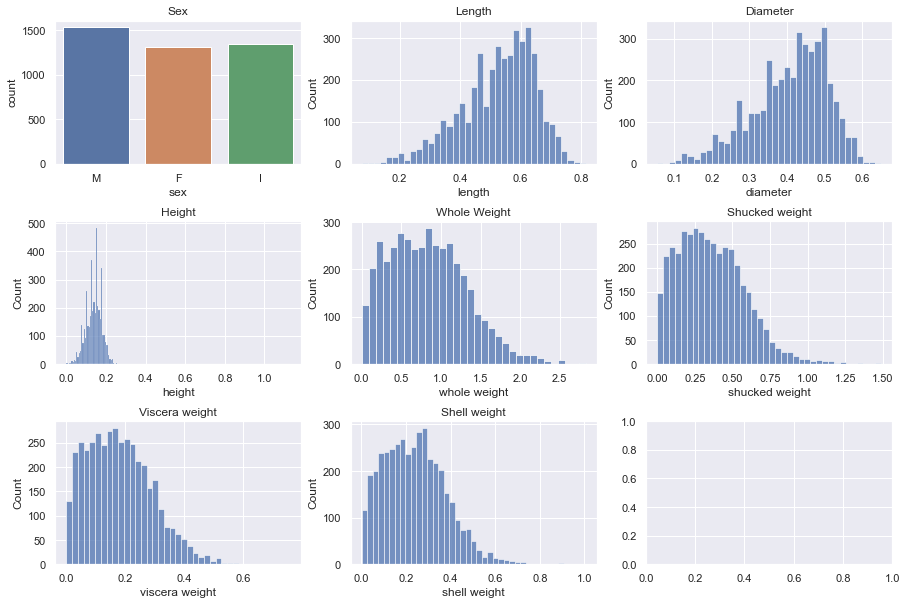

In [126]:
abalone = read_dataset()
visualise_features(abalone)
abalone_labels = abalone['rings']
#abalone_features = onehotencoding(abalone.iloc[:, :-1])
abalone_features = abalone.iloc[:, 1:-1]
X_train, X_test, y_train, y_test = split_normalised_dataset(abalone_features, abalone_labels)

(a) Iteration vs RMSE graph on validation set for all 5 models from Kfold cross validation

(a) Iteration vs RMSE graph for all 5 models
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


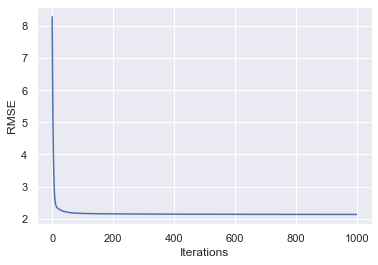

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


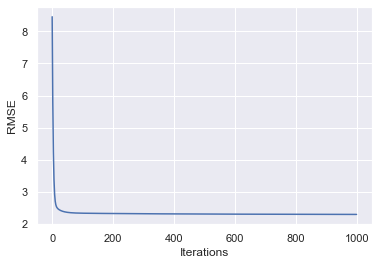

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


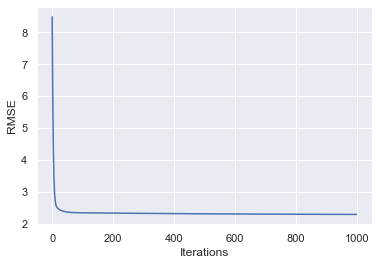

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


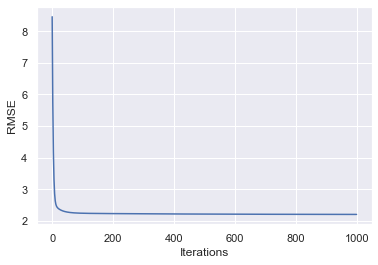

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


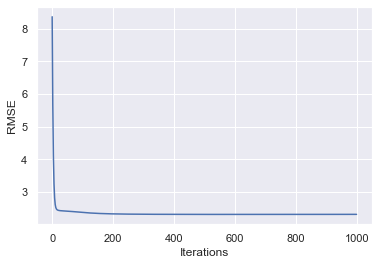

In [118]:
print("(a) Iteration vs RMSE graph for all 5 models")
weights, intercept, avg_rmse = Kfold_Cross_Val(X_train, y_train)

(b) Calls the modified linear regression functions that include lasso and ridge regularization respectively. Kfold performing function itself calls the actual linear regression function.

(b) Iteration vs RMSE graphs for Lasso model at various penalty values
-----------------------------------------------------
Penalty:  0.0005
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


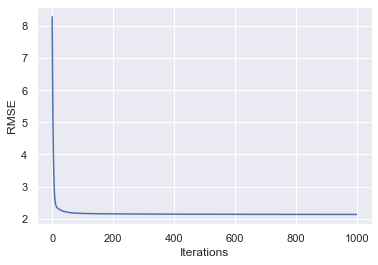

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


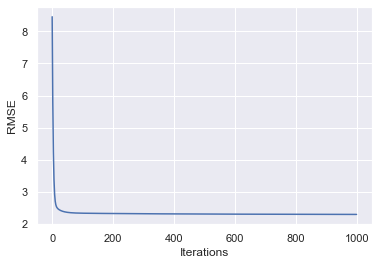

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


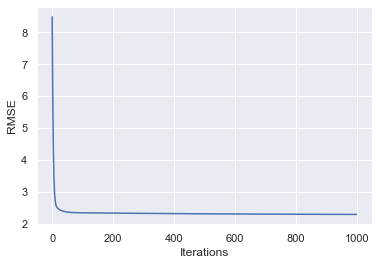

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


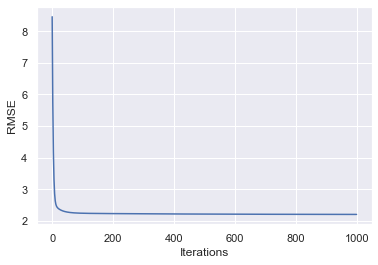

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


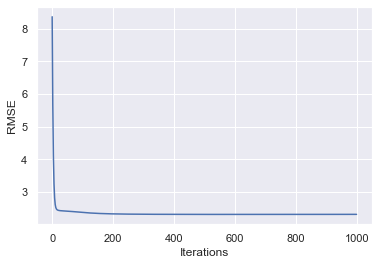

Average RMSE from K-Fold Cross Validation:  2.2504514922677568
-----------------------------------------------------
Penalty:  0.001
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


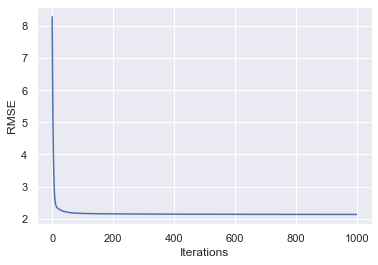

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


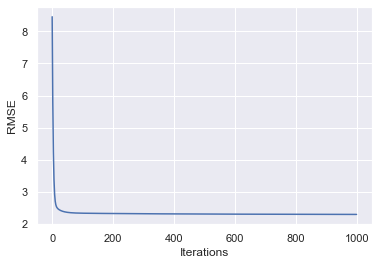

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


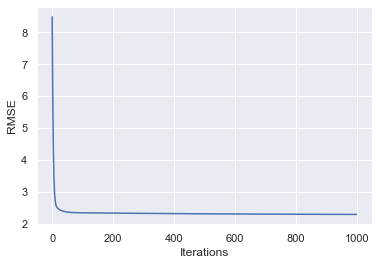

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


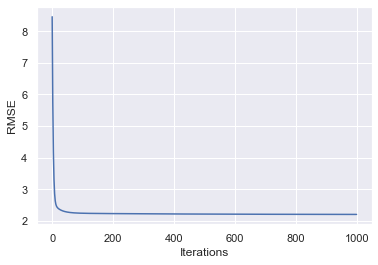

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


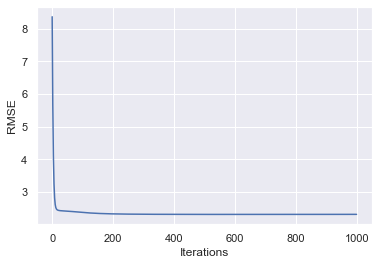

Average RMSE from K-Fold Cross Validation:  2.2504514867831724
-----------------------------------------------------
Penalty:  0.01
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


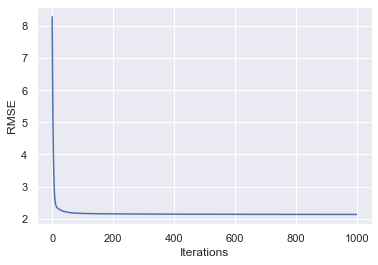

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


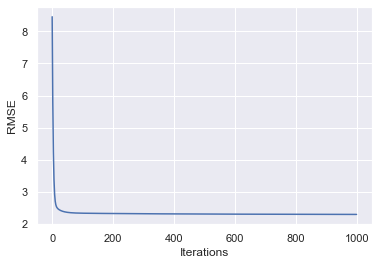

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


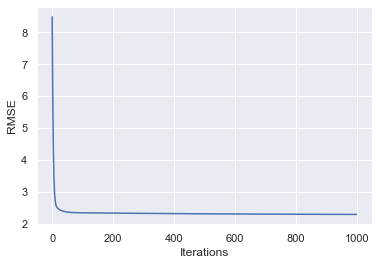

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


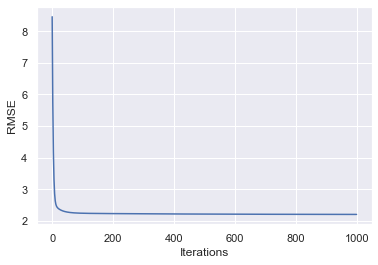

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


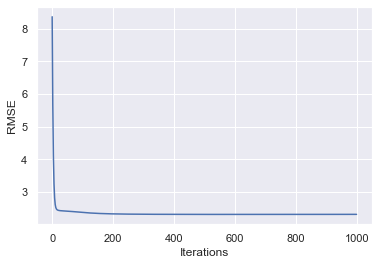

Average RMSE from K-Fold Cross Validation:  2.250451388061375
-----------------------------------------------------
Penalty:  0.05
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


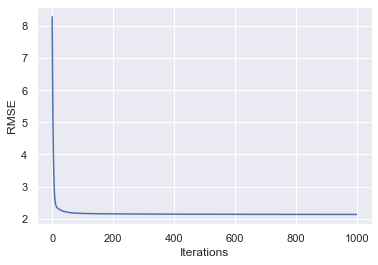

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


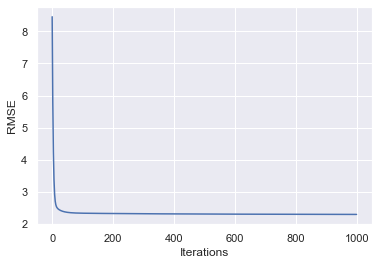

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


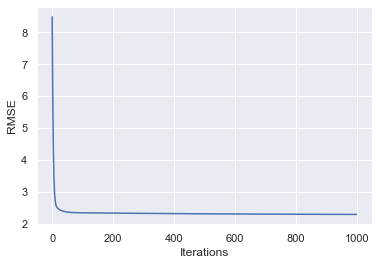

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


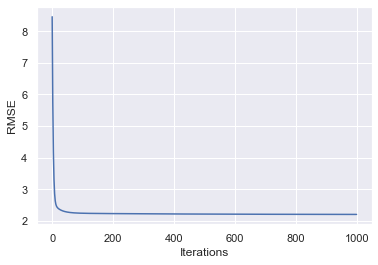

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


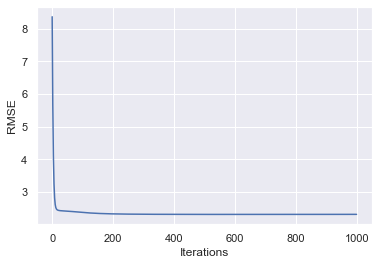

Average RMSE from K-Fold Cross Validation:  2.250450949314555
-----------------------------------------------------
Penalty:  0.1
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


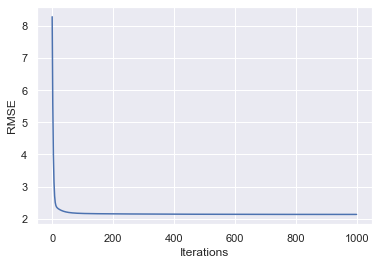

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


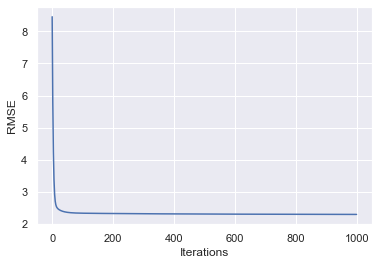

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


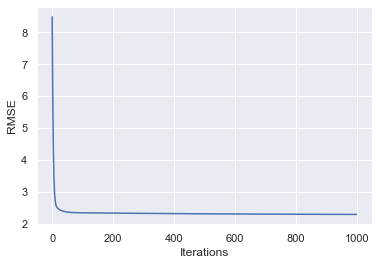

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


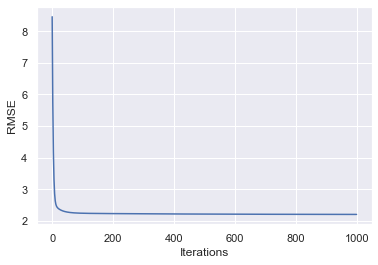

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


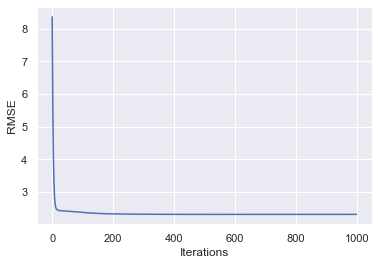

Average RMSE from K-Fold Cross Validation:  2.2504504009194273
-----------------------------------------------------
Penalty:  5
Iteration:  1
R2 scpre: 0.52108
Variance score: 0.52108
Root mean squared error: 2.13658


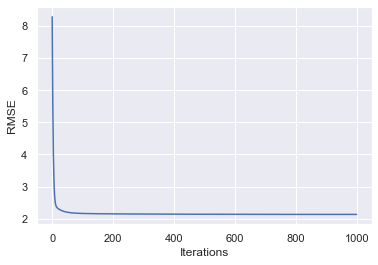

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


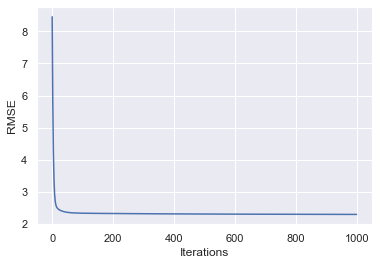

Iteration:  3
R2 scpre: 0.52013
Variance score: 0.52013
Root mean squared error: 2.30105


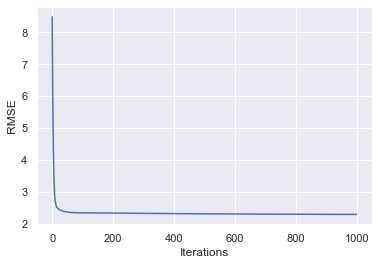

Iteration:  4
R2 scpre: 0.57019
Variance score: 0.57019
Root mean squared error: 2.20198


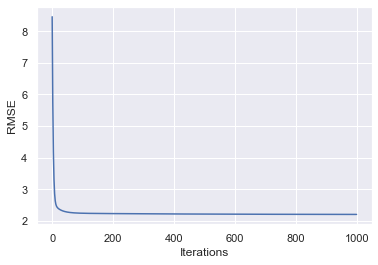

Iteration:  5
R2 scpre: 0.48328
Variance score: 0.48328
Root mean squared error: 2.31342


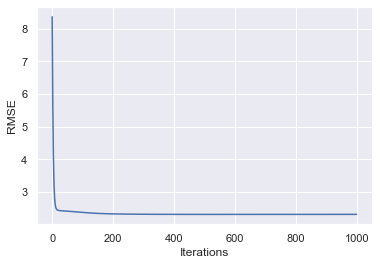

Average RMSE from K-Fold Cross Validation:  2.2503969146939524
The optimal penalty for lasso is:  0.0005


In [119]:
print("(b) Iteration vs RMSE graphs for Lasso model at various penalty values")
penaltiesl = [0.0005, 0.001, 0.01, 0.05, 0.1, 5]
min_rmse_lasso = float('inf')
opt_penalty_lasso = 0
weights_lasso = []
intercept_lasso = 0
for i in range(len(penaltiesl)):
    print("-----------------------------------------------------")
    print("Penalty: ", penaltiesl[i])
    weightsl, interceptl, avg_rmsel = Kfold_Cross_Val_Lasso(X_train, y_train, penaltiesl[i])
    print("Average RMSE from K-Fold Cross Validation: ", avg_rmsel)
    if(min_rmse_lasso > avg_rmse):
        min_rmse_lasso = avg_rmsel
        opt_penalty_lasso = penaltiesl[i]
        weights_lasso = weightsl
        intercept_lasso = interceptl

print("The optimal penalty for lasso is: ", opt_penalty_lasso)

(b) Iteration vs RMSE graphs for Ridge model at various penalty values
-----------------------------------------------------
Penalty:  0.001
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


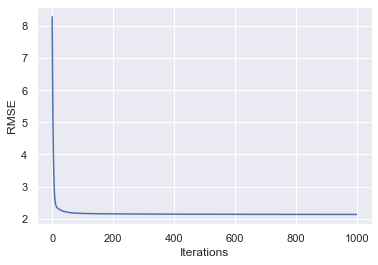

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


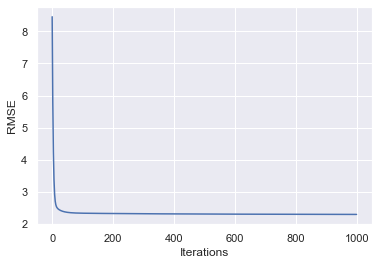

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


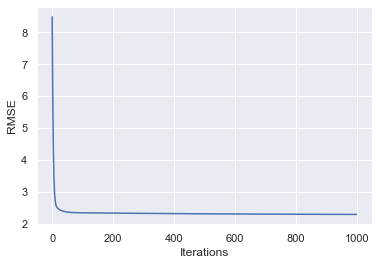

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


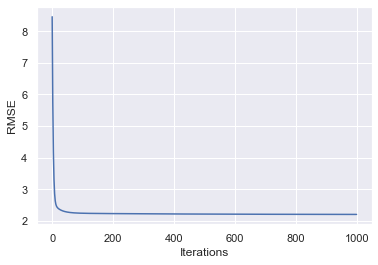

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


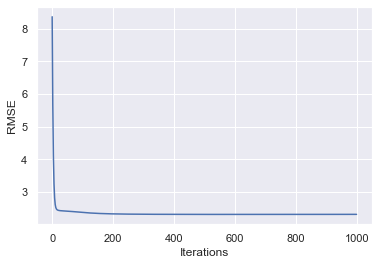

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  0.01
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


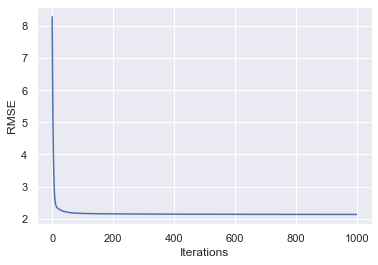

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


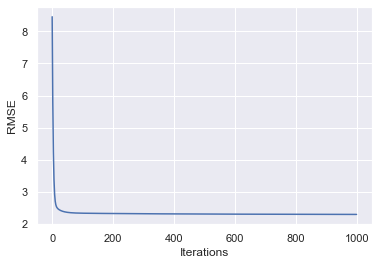

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


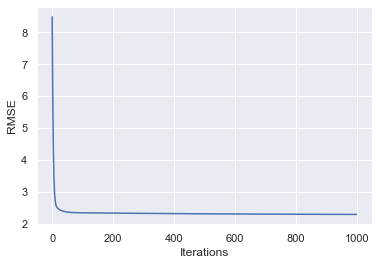

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


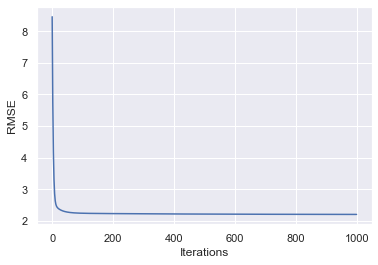

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


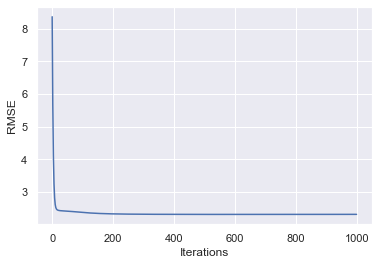

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  0.05
Iteration:  1
R2 scpre: 0.52105
Variance score: 0.52105
Root mean squared error: 2.13664


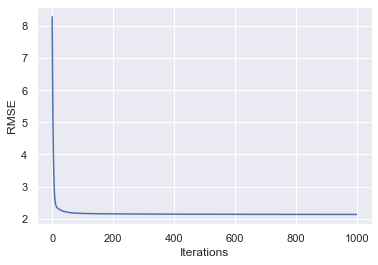

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


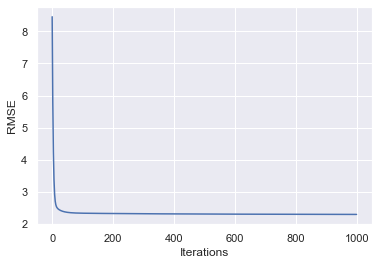

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


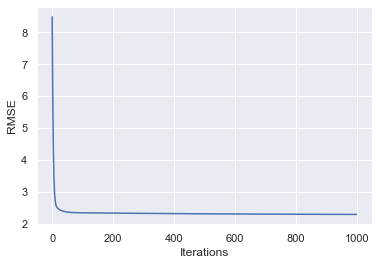

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


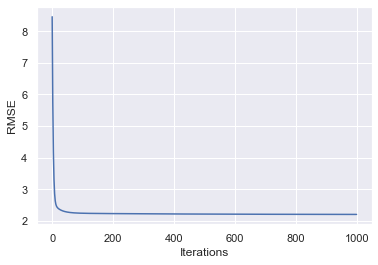

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31358


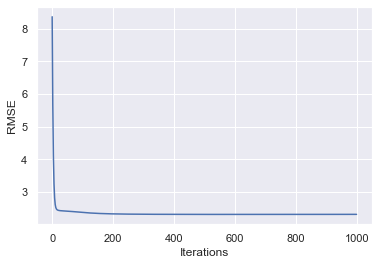

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  0.1
Iteration:  1
R2 scpre: 0.52106
Variance score: 0.52106
Root mean squared error: 2.13664


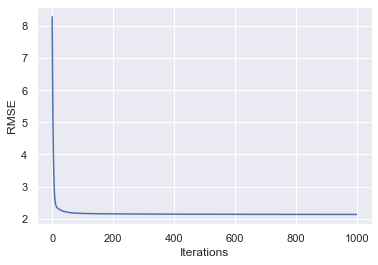

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


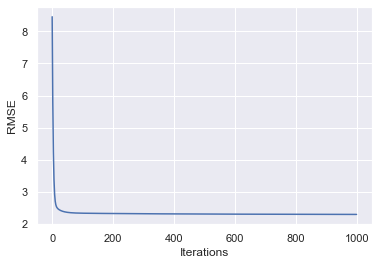

Iteration:  3
R2 scpre: 0.52009
Variance score: 0.52009
Root mean squared error: 2.30115


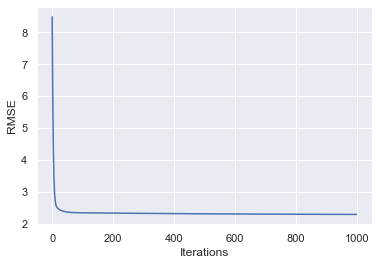

Iteration:  4
R2 scpre: 0.57021
Variance score: 0.57021
Root mean squared error: 2.20194


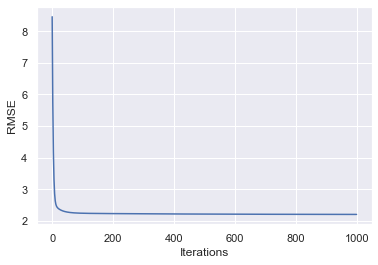

Iteration:  5
R2 scpre: 0.48321
Variance score: 0.48321
Root mean squared error: 2.31357


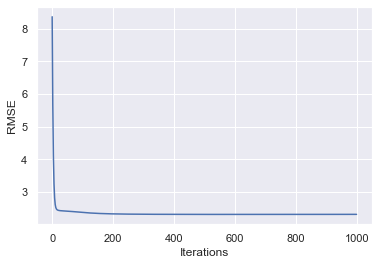

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  0.5
Iteration:  1
R2 scpre: 0.52106
Variance score: 0.52106
Root mean squared error: 2.13662


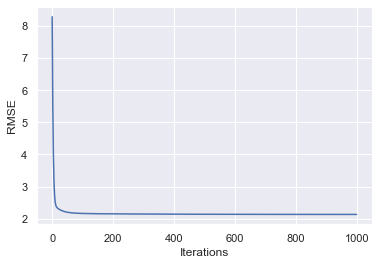

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29895


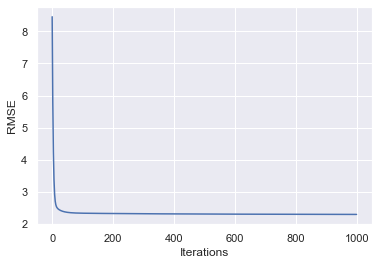

Iteration:  3
R2 scpre: 0.52010
Variance score: 0.52010
Root mean squared error: 2.30113


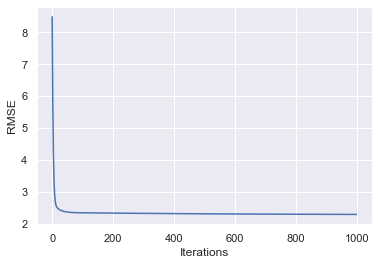

Iteration:  4
R2 scpre: 0.57020
Variance score: 0.57020
Root mean squared error: 2.20196


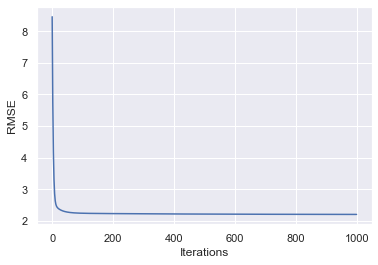

Iteration:  5
R2 scpre: 0.48324
Variance score: 0.48324
Root mean squared error: 2.31352


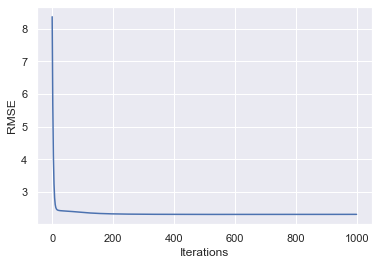

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  1
Iteration:  1
R2 scpre: 0.52107
Variance score: 0.52107
Root mean squared error: 2.13660


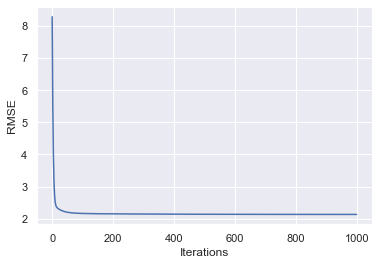

Iteration:  2
R2 scpre: 0.50497
Variance score: 0.50497
Root mean squared error: 2.29896


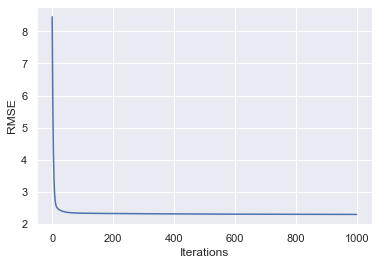

Iteration:  3
R2 scpre: 0.52011
Variance score: 0.52011
Root mean squared error: 2.30111


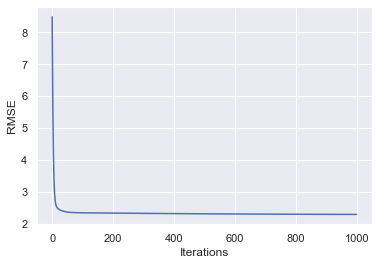

Iteration:  4
R2 scpre: 0.57019
Variance score: 0.57019
Root mean squared error: 2.20198


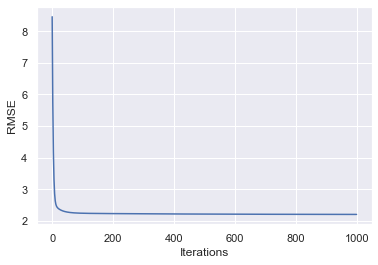

Iteration:  5
R2 scpre: 0.48326
Variance score: 0.48326
Root mean squared error: 2.31346


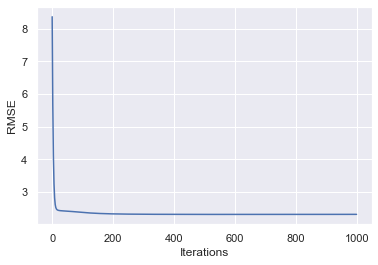

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
-----------------------------------------------------
Penalty:  5
Iteration:  1
R2 scpre: 0.52114
Variance score: 0.52114
Root mean squared error: 2.13644


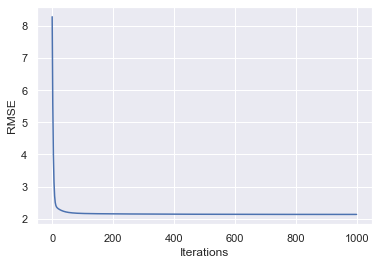

Iteration:  2
R2 scpre: 0.50495
Variance score: 0.50495
Root mean squared error: 2.29899


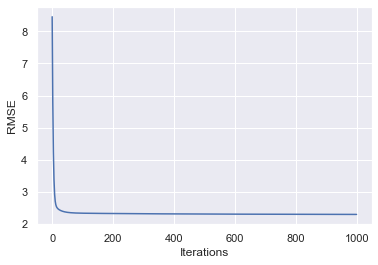

Iteration:  3
R2 scpre: 0.52018
Variance score: 0.52018
Root mean squared error: 2.30093


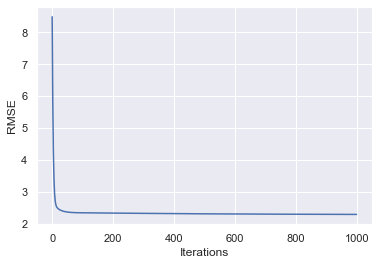

Iteration:  4
R2 scpre: 0.57013
Variance score: 0.57013
Root mean squared error: 2.20214


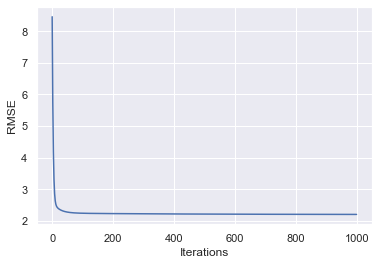

Iteration:  5
R2 scpre: 0.48348
Variance score: 0.48348
Root mean squared error: 2.31296


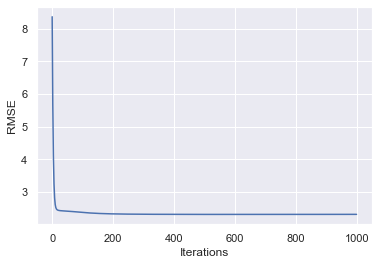

Average RMSE from K-Fold Cross Validation:  2.2504514977523464
The optimal penalty for ridge is:  5


In [120]:
print("(b) Iteration vs RMSE graphs for Ridge model at various penalty values")
penaltiesr = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5]
min_rmse_ridge = float('inf')
opt_penalty_ridge = 0
weights_ridge = []
intercept_ridge = 0
for i in range(len(penaltiesr)):
    print("-----------------------------------------------------")
    print("Penalty: ", penaltiesr[i])
    weightsr, interceptr, avg_rmser = Kfold_Cross_Val_Ridge(X_train, y_train, penaltiesr[i])
    print("Average RMSE from K-Fold Cross Validation: ", avg_rmse)
    if(min_rmse_ridge > avg_rmser):
        min_rmse_ridge = avg_rmser
        opt_penalty_ridge = penaltiesr[i]
        weights_ridge = weightsr
        intercept_ridge = interceptr

print("The optimal penalty for ridge is: ", opt_penalty_ridge)

(c) Test set accuracy of the best models:

In [121]:
#Test set accuracy of the best models:

print("(c) Test set accuracy of the best models:")
print("-----------------------------------------------------")
print("Only Regression: ")
r = display_metrics(y_test, predict_linear_regression(weights, intercept, X_test))
print("-----------------------------------------------------")
print("Regression + L1: ")
r = display_metrics(y_test, predict_linear_regression(weights_lasso, intercept_lasso, X_test))
print("-----------------------------------------------------")
print("Regression + L2: ")
r = display_metrics(y_test, predict_linear_regression(weights_ridge, intercept_ridge, X_test))

(c) Test set accuracy of the best models:
-----------------------------------------------------
Only Regression: 
R2 scpre: 0.45313
Variance score: 0.45313
Root mean squared error: 2.17520
-----------------------------------------------------
Regression + L1: 
R2 scpre: 0.45313
Variance score: 0.45313
Root mean squared error: 2.17520
-----------------------------------------------------
Regression + L2: 
R2 scpre: 0.45316
Variance score: 0.45316
Root mean squared error: 2.17513


(d) Using sklearn's implementation of linear regression to find the test set accuracy of the best models:

In [122]:
#Sklearn implementation:
print("(d) Test set accuracy of the sklearn implementation:")
print("-----------------------------------------------------")
print("Only Regression: ")
lin_regr = linear_regression_sklearn(X_train, y_train)
r = display_metrics(y_test, lin_regr.predict(X_test))
print("-----------------------------------------------------")
print("Regression + L1: ")
lin_regr = lasso_regression_sklearn(X_train, y_train, penalty = opt_penalty_lasso)
r = display_metrics(y_test, lin_regr.predict(X_test))
print("-----------------------------------------------------")
print("Regression + L2: ")
lin_regr = ridge_regression_sklearn(X_train, y_train, penalty = opt_penalty_ridge)
r = display_metrics(y_test, lin_regr.predict(X_test))

(d) Test set accuracy of the sklearn implementation:
-----------------------------------------------------
Only Regression: 
R2 scpre: 0.45709
Variance score: 0.45709
Root mean squared error: 2.16730
-----------------------------------------------------
Regression + L1: 
R2 scpre: 0.45735
Variance score: 0.45735
Root mean squared error: 2.16679
-----------------------------------------------------
Regression + L2: 
R2 scpre: 0.46256
Variance score: 0.46256
Root mean squared error: 2.15636


compare and analyse the difference in results (in doc)

(e) Normal equation (closed form) for linear regression to get the optimal parameters directly for each fold. Accuracy reported on the respective validation sets.

In [123]:
#Closed form linear regression
Kfold_Cross_Val_Closed_Form(X_train, y_train)

Iteration:  1
R2 scpre: 0.51930
Variance score: 0.51930
Root mean squared error: 2.14055
Iteration:  2
R2 scpre: 0.50843
Variance score: 0.50843
Root mean squared error: 2.29091
Iteration:  3
R2 scpre: 0.52568
Variance score: 0.52568
Root mean squared error: 2.28770
Iteration:  4
R2 scpre: 0.57180
Variance score: 0.57180
Root mean squared error: 2.19786
Iteration:  5
R2 scpre: 0.47857
Variance score: 0.47857
Root mean squared error: 2.32393
